# Predictive_maintenance

### But

L'objectif est d'utiliser des algorithmes de clustering sur un ensemble de données de maintenance prédictive pour regrouper les produits en fonction de leurs caractéristiques. Cette approche permettra de mieux comprendre les similarités entre les produits et d'identifier des sous-groupes homogènes. En segmentant les produits de cette manière, nous pourrons développer des modèles de maintenance prédictive plus précis pour prédire avec précision les défaillances des produits. 

## Index

1-Collecte des donnees 

2-Traitement de données

3-Analyse exploratoire des données et visualisation des données

4-Clustering

## 1-Collecte des données

### Source :

Les données ont été collectées à partir du célèbre site web Kaggle qui contient de nombreux ensembles de données et informations utiles.
        
   Lien : https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification



### Importer les bibliothèque & dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
dataset = "predictive_maintenance.csv"
data = pd.read_csv(dataset)
data.head(10)

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   
5    6     M14865    M                298.1                    308.6   
6    7     L47186    L                298.1                    308.6   
7    8     L47187    L                298.1                    308.6   
8    9     M14868    M                298.3                    308.7   
9   10     M14869    M                298.5                    309.0   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure  
5                    1425         41.9               11       0   No Failure  
6                    1558         42.4               14       0   No Failure  
7                    1527         40.2               16       0   No Failure  
8                    1667         28.6               18       0   No Failure  
9                    1741         28.0               21       0   No Failure

In [2]:
data.shape

(10000, 10)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


# Description de l'ensemble de données sur la maintenance prédictive
  • Product ID: C'est un identifiant unique attribué à chaque produit dans l ensemble de données.
  
  • Type: Indique la catégorie à laquelle chaque produit appartient, classée en faible (L), moyen (M) ou élevé (H).
  
  • Air temperature [K]: Cela représente la température de l'air en Kelvin.
  
  • Process temperature [K]: Il s agit de la température du processus en Kelvin.
  
  • Rotational speed [rpm]: C'est la vitesse de rotation de la machine, mesurée en tours par minute (RPM).
  
  • Torque [Nm]: Le couple représente la force de rotation appliquée par la machine, mesurée en Newton-mètres (Nm).
  
  • Tool wear [min]: Il s'agit du temps d'utilisation de l'outil, mesuré en minutes.
  
  • Target: Indique si une défaillance s est produite ou non.
  
  • Failure Type: Si une défaillance s'est produite, cette colonne indique le type de défaillance.

## 2-Traitement des données

In [4]:
#vérifier les valeurs manquantes
data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [5]:
#vérifier les valeurs manquantes
data.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [6]:
#vérifier les valeurs dupliqués 
data.duplicated().sum().any()

False

In [7]:
#On supprime la colonne Failure Type pour rendre notre dataset non étiqueté 
X=data.drop('Failure Type',axis=1)

In [8]:
X.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  
0                    1551         42.8                0       0  
1                    1408         46.3                3       0  
2                    1498         49.4                5       0  
3                    1433         39.5                7       0  
4                    1408         40.0                9       0

In [9]:
#meme procedure pour la colonne target
df=X.drop('Target',axis=1)

In [10]:
df.head(2)

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
0                    1551         42.8                0  
1                    1408         46.3                3

In [11]:
#Renommer les colonnes 
df.columns=['UDI','product_ID','type','air_temperature','process_temperature','rotational_speed','torque','toolwear']

In [12]:
# rendre la colonne UDI comme index de notre tableau
df=df.set_index('UDI')

In [13]:
df.head()

product_ID type  air_temperature  process_temperature  rotational_speed  \
UDI                                                                           
1       M14860    M            298.1                308.6              1551   
2       L47181    L            298.2                308.7              1408   
3       L47182    L            298.1                308.5              1498   
4       L47183    L            298.2                308.6              1433   
5       L47184    L            298.2                308.7              1408   

     torque  toolwear  
UDI                    
1      42.8         0  
2      46.3         3  
3      49.4         5  
4      39.5         7  
5      40.0         9

on remarque qu il ya 2 variables categoriques dans notre dataset : Product_ID , Type . on va les exploiter

In [14]:
df['product_ID'].unique()

array(['M14860', 'L47181', 'L47182', ..., 'M24857', 'H39412', 'M24859'],
      dtype=object)

In [15]:
len(df['product_ID'].unique())

10000

Nous constatons qu'il y a 1000 identifiants uniques dans la variable Product_ID, tandis que le nombre total d'instances dans le jeu de données est de 1000. Cela suggère que chaque instance est associée à un identifiant unique, en faisant ainsi une variable peu utile pour notre analyse. Par conséquent, je vais la supprimer du jeu de données.

In [16]:
df['type'].unique()


array(['M', 'L', 'H'], dtype=object)

nous pouvons voir qu il y a seulement 3On remarque la présence de 3 catégories de libellés dans la variable 'Type'

In [17]:
dataset=df.drop('product_ID',axis=1)
dataset.head()

type  air_temperature  process_temperature  rotational_speed  torque  \
UDI                                                                        
1      M            298.1                308.6              1551    42.8   
2      L            298.2                308.7              1408    46.3   
3      L            298.1                308.5              1498    49.4   
4      L            298.2                308.6              1433    39.5   
5      L            298.2                308.7              1408    40.0   

     toolwear  
UDI            
1           0  
2           3  
3           5  
4           7  
5           9

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type                 10000 non-null  object 
 1   air_temperature      10000 non-null  float64
 2   process_temperature  10000 non-null  float64
 3   rotational_speed     10000 non-null  int64  
 4   torque               10000 non-null  float64
 5   toolwear             10000 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 546.9+ KB


Il est à noter qu'il y a une colonne non numérique Type, dans le jeu de données. on va la convertir en équivalents entiers.

In [19]:
X = dataset
y = dataset['type']

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['type'] = le.fit_transform(X['type'])
y = le.transform(y)

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type                 10000 non-null  int32  
 1   air_temperature      10000 non-null  float64
 2   process_temperature  10000 non-null  float64
 3   rotational_speed     10000 non-null  int64  
 4   torque               10000 non-null  float64
 5   toolwear             10000 non-null  int64  
dtypes: float64(3), int32(1), int64(2)
memory usage: 507.8 KB


In [22]:
X.head()

type  air_temperature  process_temperature  rotational_speed  torque  \
UDI                                                                         
1       2            298.1                308.6              1551    42.8   
2       1            298.2                308.7              1408    46.3   
3       1            298.1                308.5              1498    49.4   
4       1            298.2                308.6              1433    39.5   
5       1            298.2                308.7              1408    40.0   

     toolwear  
UDI            
1           0  
2           3  
3           5  
4           7  
5           9

## NORMALISATION

In [23]:
cols = X.columns

In [24]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)

In [25]:
X = pd.DataFrame(X, columns=[cols])
X.head(8)

type air_temperature process_temperature rotational_speed    torque  \
0  1.0        0.304348            0.358025         0.222934  0.535714   
1  0.5        0.315217            0.370370         0.139697  0.583791   
2  0.5        0.304348            0.345679         0.192084  0.626374   
3  0.5        0.315217            0.358025         0.154249  0.490385   
4  0.5        0.315217            0.370370         0.139697  0.497253   
5  1.0        0.304348            0.358025         0.149593  0.523352   
6  0.5        0.304348            0.358025         0.227008  0.530220   
7  0.5        0.304348            0.358025         0.208964  0.500000   

   toolwear  
0  0.000000  
1  0.011858  
2  0.019763  
3  0.027668  
4  0.035573  
5  0.043478  
6  0.055336  
7  0.063241

## 3- Analyse exploratoire des données et visualisation des données


Inspecter la relation entre chaque caractéristique à l'aide d'un diagramme à paires

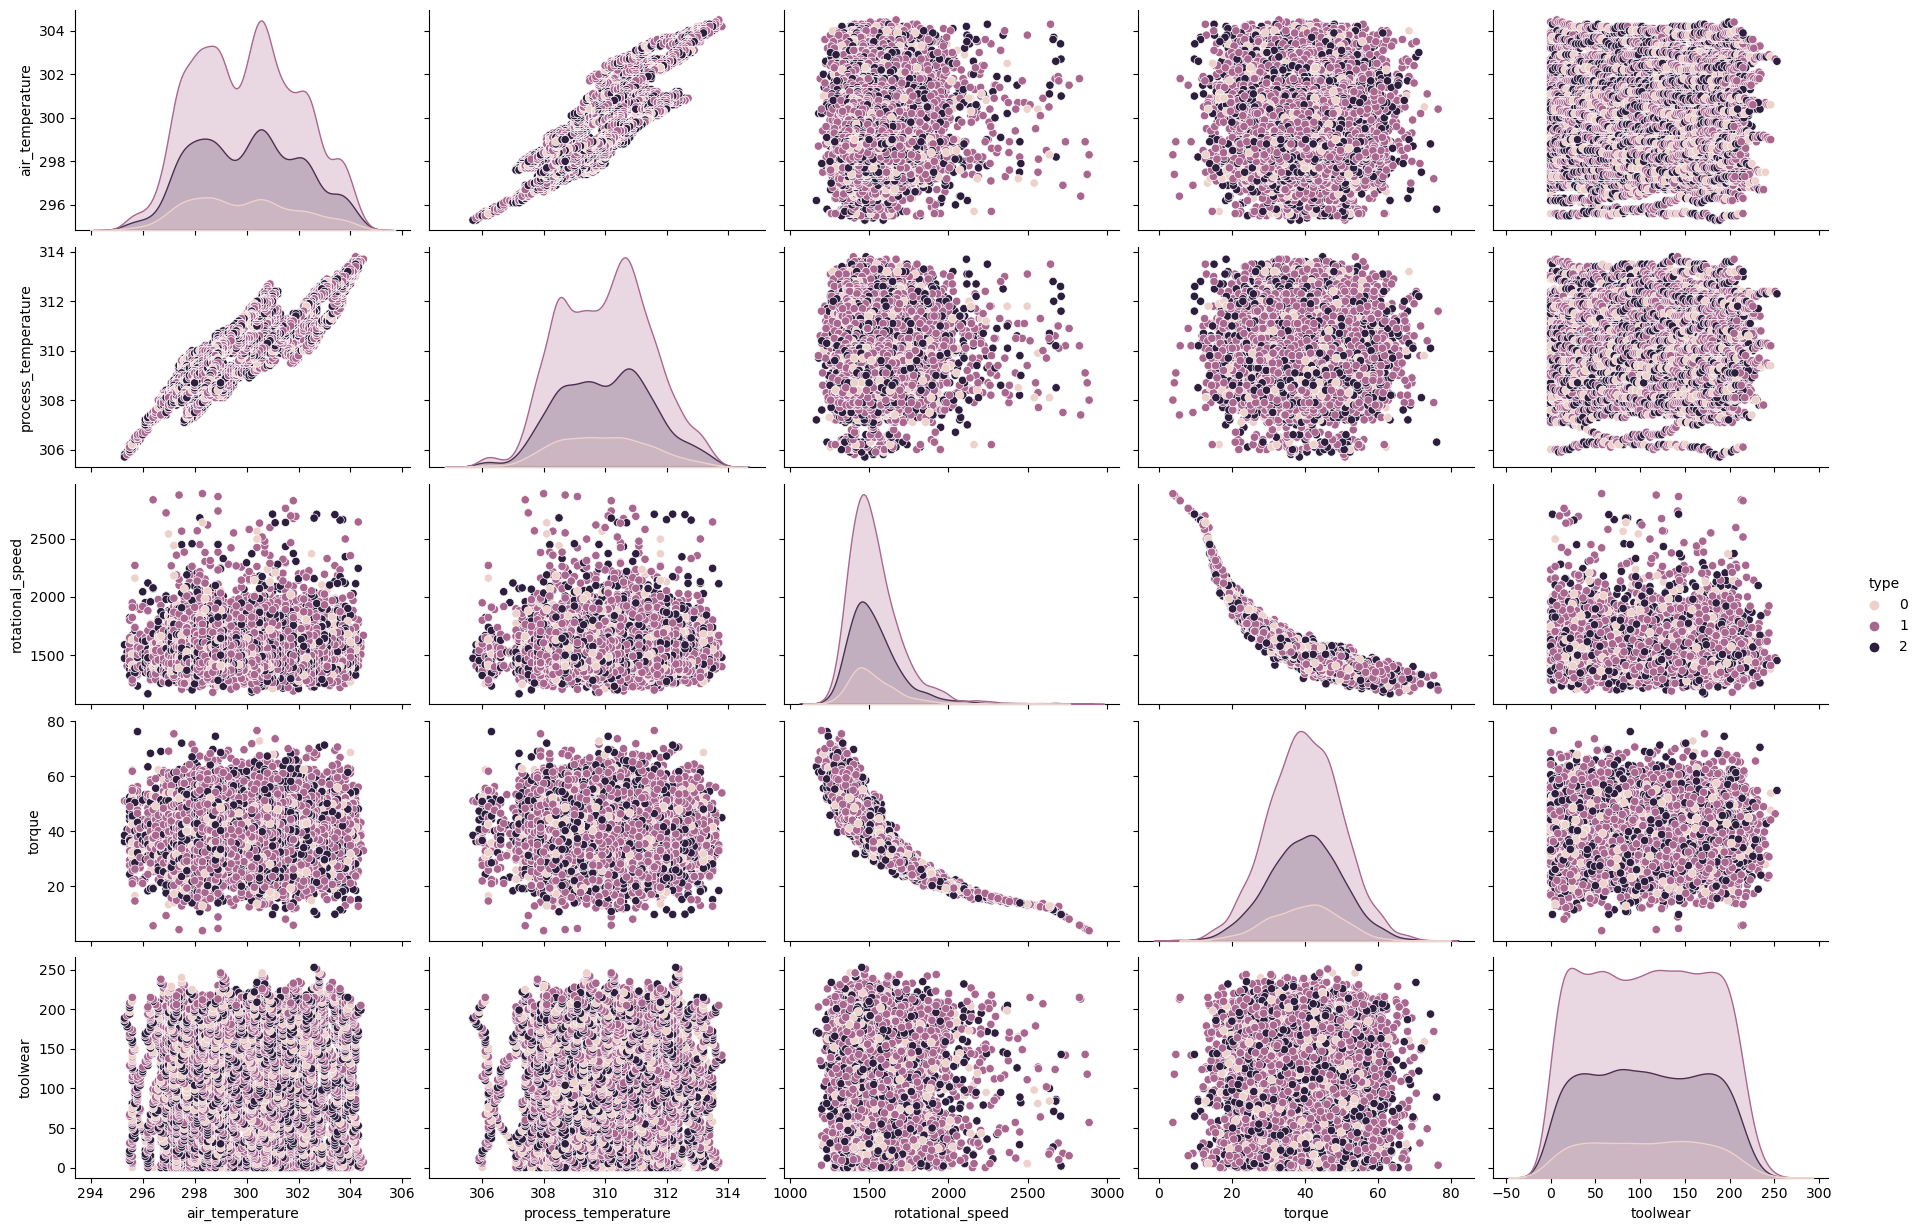

In [26]:
import warnings
warnings.simplefilter(action='ignore')
sns.pairplot(data=dataset, hue='type',aspect=1.5)
plt.show()

       •Le graphique ci-dessus montre qu'il n'y a pas une différence évidente entre les trois types des produits
       •Par conséquent,nous allons supprimer la colonne'type'

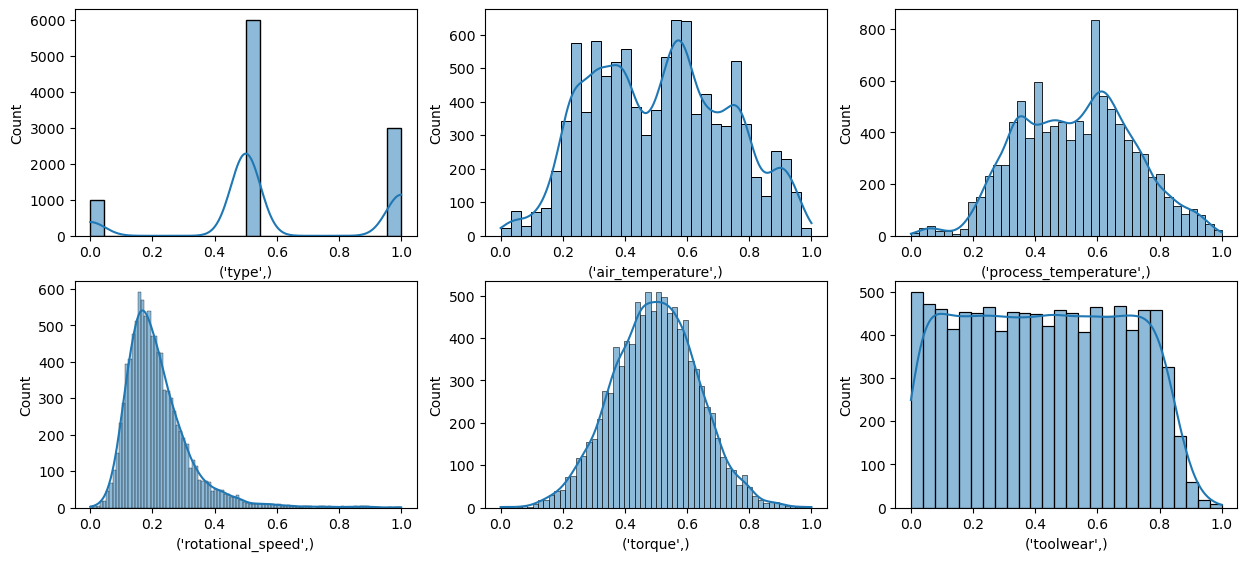

In [27]:
plt.figure(figsize=(15,10))
for i,col in enumerate(X.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(X[col],kde=True)

array([[<Axes: title={'center': "('type',)"}>,
        <Axes: title={'center': "('air_temperature',)"}>],
       [<Axes: title={'center': "('process_temperature',)"}>,
        <Axes: title={'center': "('rotational_speed',)"}>],
       [<Axes: title={'center': "('torque',)"}>,
        <Axes: title={'center': "('toolwear',)"}>]], dtype=object)

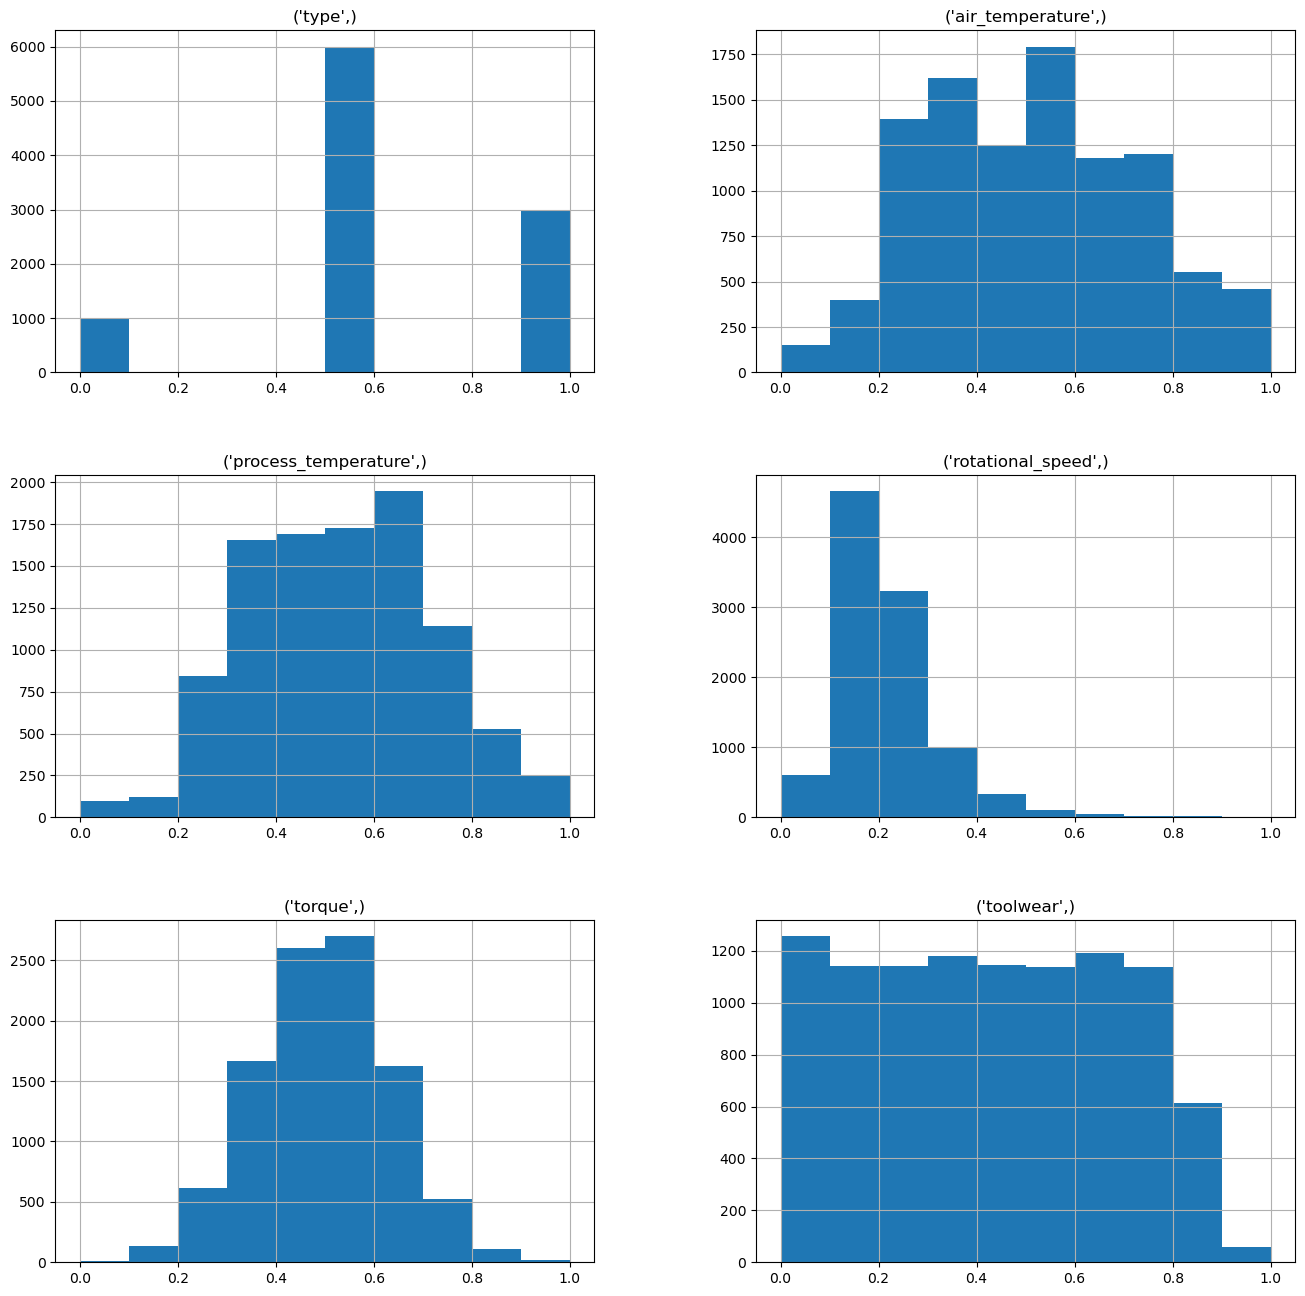

In [28]:
X.hist(figsize=(16, 16))

In [29]:
X.describe()

type air_temperature process_temperature rotational_speed  \
count  10000.000000    10000.000000        10000.000000     10000.000000   
mean       0.599700        0.511405            0.531551         0.215818   
std        0.300115        0.217419            0.183177         0.104356   
min        0.000000        0.000000            0.000000         0.000000   
25%        0.500000        0.326087            0.382716         0.148428   
50%        0.500000        0.521739            0.543210         0.194994   
75%        1.000000        0.673913            0.666667         0.258440   
max        1.000000        1.000000            1.000000         1.000000   

             torque      toolwear  
count  10000.000000  10000.000000  
mean       0.497073      0.426684  
std        0.136936      0.251597  
min        0.000000      0.000000  
25%        0.403846      0.209486  
50%        0.498626      0.426877  
75%        0.590659      0.640316  
max        1.000000      1.000000

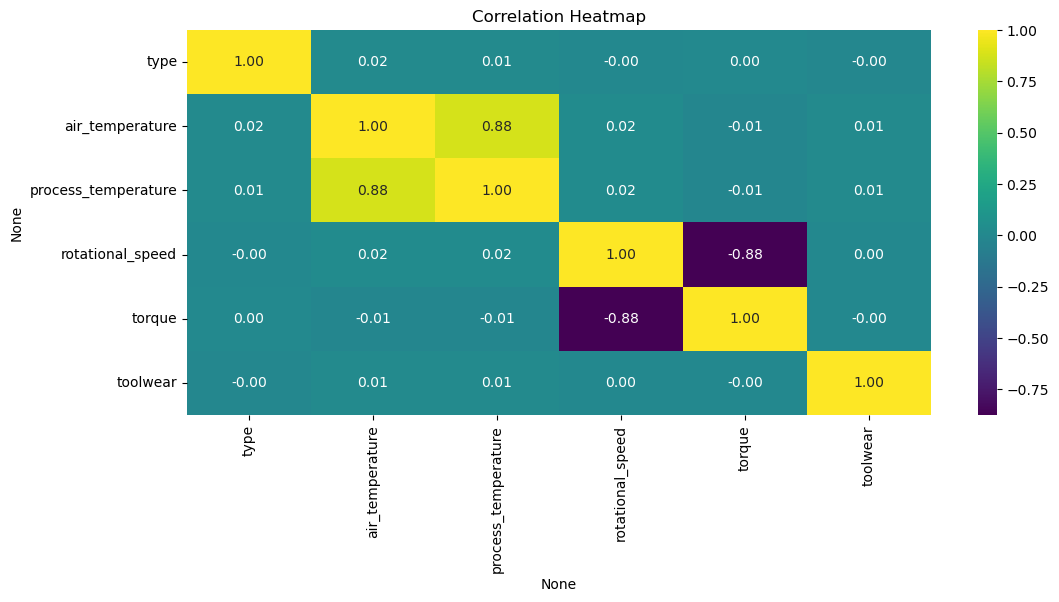

In [30]:
correlation_matrix = X.corr()
plt.figure(figsize=(12, 5))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
heatmap.set_title('Correlation Heatmap')
plt.show()

## 4- Clustering

Suppression de la colonne "type" pour nos trois techniques de regroupement basées sur la distance.

In [31]:
X=X.drop('type',axis=1)

In [32]:
X.head()

air_temperature process_temperature rotational_speed    torque  toolwear
0        0.304348            0.358025         0.222934  0.535714  0.000000
1        0.315217            0.370370         0.139697  0.583791  0.011858
2        0.304348            0.345679         0.192084  0.626374  0.019763
3        0.315217            0.358025         0.154249  0.490385  0.027668
4        0.315217            0.370370         0.139697  0.497253  0.035573

Le regroupement K-Means est l'un des algorithmes de regroupement les plus simples et les plus couramment utilisés. Il fonctionne comme suit :

Attribuer aléatoirement k = n_clusters de centres de cluster (centroïdes). Attribuer chaque point de données aux centroïdes les plus proches. Calculer la moyenne de tous les points de chaque grappe et réaffecter le centroïde de chaque grappe comme moyenne. Réaffecter chaque point de données au centroïde le plus proche sur la base de la distance euclidienne. Répétez les étapes 3 et 4 jusqu'à ce que la somme totale de la variation intra-groupe sur les trois groupes soit minimale.

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
clusters = []
ss = []

#Calculer toutes les sommes des variances intra-clusters pour n_clusters de 2 à 14

for i in range(2,15):
    km = KMeans(n_clusters = i)
    km.fit(X)
    clusters.append(km.inertia_)
    ss.append(silhouette_score(X, km.labels_, metric='euclidean'))

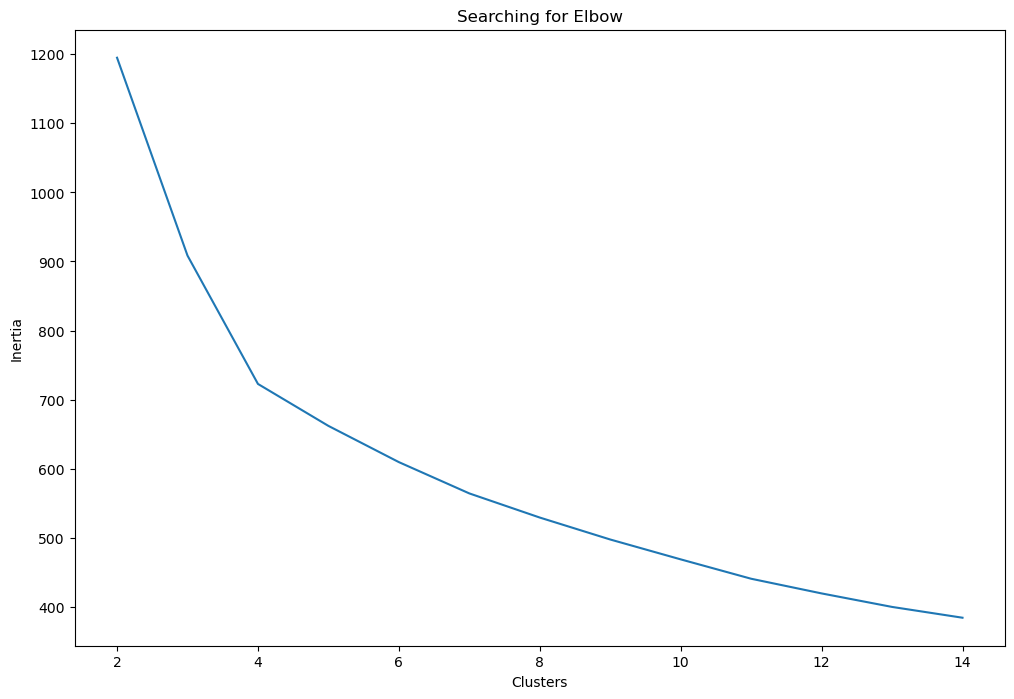

In [34]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(2, 15)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


plt.show()

d'apres le graphe ci-dessus on doit choisir les deux points de coude (4 et 3), de les utiliser pour le clustering, d'évaluer les résultats sur la base de notre connaissance du domaine et enfin de choisir le meilleur n_clusters. Augmenter le nombre de grappes à partir de ce point n'apporte pas beaucoup d'informations supplémentaires et peut produire des résultats indésirables. En règle générale, nous choisissons les n_clusters en fonction du point de coude.

Text(0, 0.5, 'Silhouette Score')

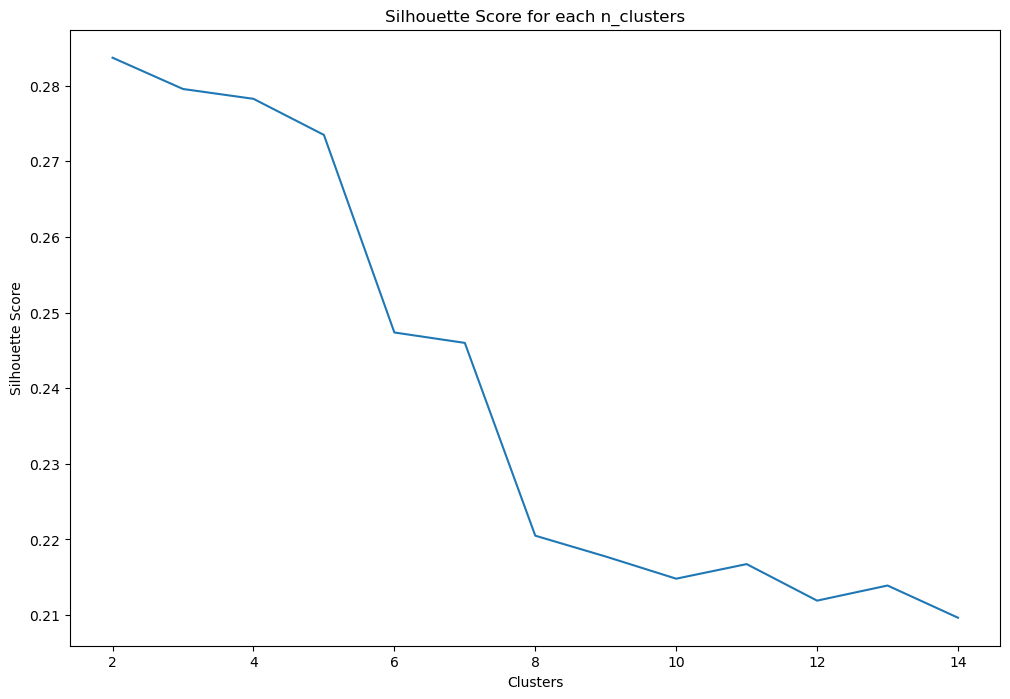

In [35]:
#le graphe du silhouette_score
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(2, 15)), y=ss, ax=ax)
ax.set_title('Silhouette Score for each n_clusters')
ax.set_xlabel('Clusters')
ax.set_ylabel('Silhouette Score')

      d'aprés le graphe on remarque que le score de silhouette tant vers -1 donc on a crée trop de grappes,et on remarque que k=2 represente le maximum du graphe.

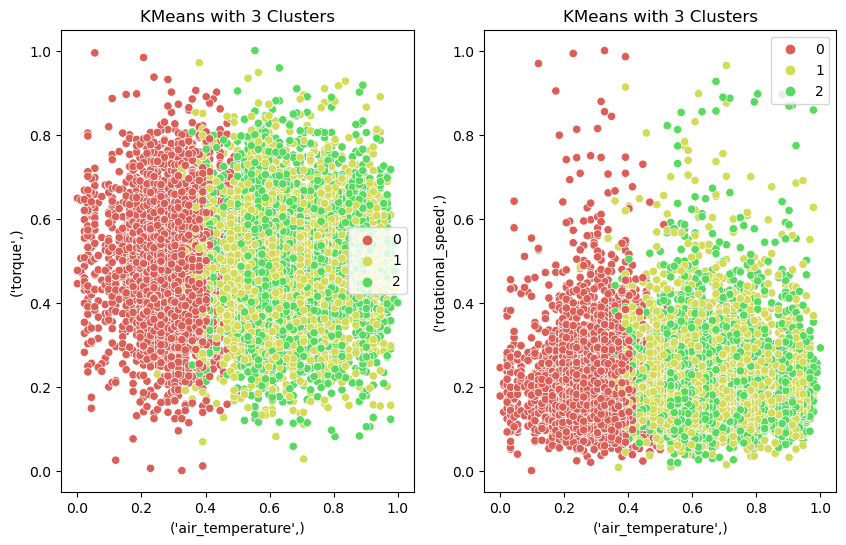

In [36]:
km3 = KMeans(n_clusters=3).fit(X)

Labels = km3.labels_

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(121)
sns.scatterplot(x=X['air_temperature'].squeeze(), y=X['torque'].squeeze(), hue=Labels.flatten(), 
                palette=sns.color_palette('hls', 6))
ax.set_title('KMeans with 3 Clusters')
ax.legend(loc='center right')

ax = fig.add_subplot(122)
sns.scatterplot(x=X['air_temperature'].squeeze(), y=X['rotational_speed'].squeeze(), hue=Labels.flatten(), 
                palette=sns.color_palette('hls', 6))
ax.set_title('KMeans with 3 Clusters')
ax.legend(loc='upper right')

plt.show()

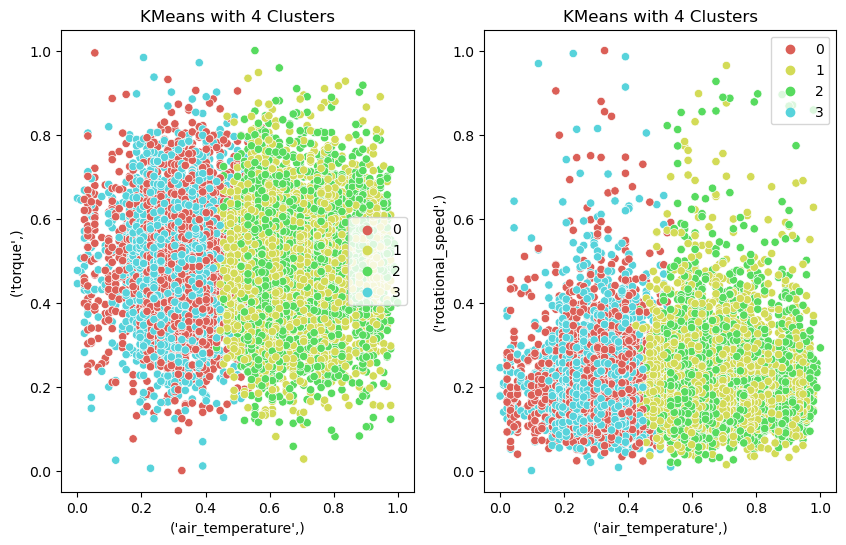

In [37]:
km4 = KMeans(n_clusters=4).fit(X)

Labels = km4.labels_

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(121)
sns.scatterplot(x=X['air_temperature'].squeeze(), y=X['torque'].squeeze(), hue=Labels.flatten(), 
                palette=sns.color_palette('hls', 6))
ax.set_title('KMeans with 4 Clusters')
ax.legend(loc='center right')

ax = fig.add_subplot(122)
sns.scatterplot(x=X['air_temperature'].squeeze(), y=X['rotational_speed'].squeeze(), hue=Labels.flatten(), 
                palette=sns.color_palette('hls', 6))
ax.set_title('KMeans with 4 Clusters')
ax.legend(loc='upper right')

plt.show()

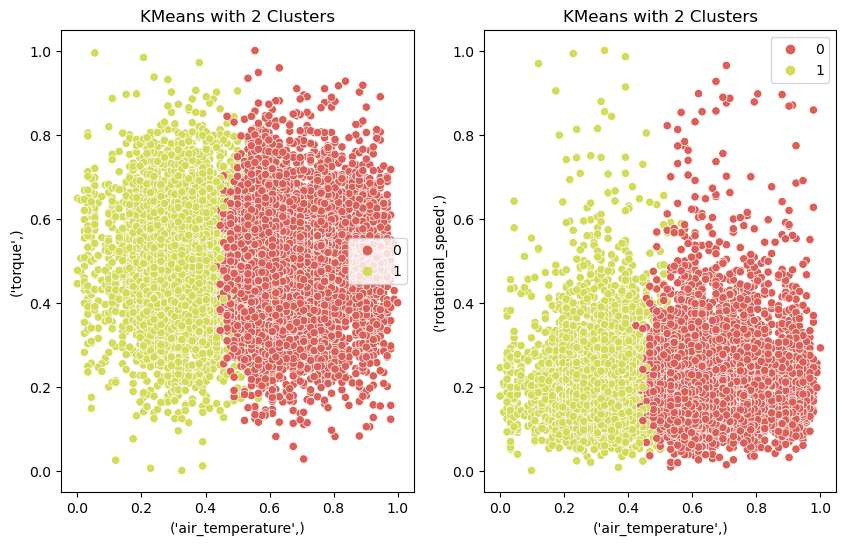

In [38]:
km2 = KMeans(n_clusters=2).fit(X)

Labels = km2.labels_

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(121)
sns.scatterplot(x=X['air_temperature'].squeeze(), y=X['torque'].squeeze(), hue=Labels.flatten(), 
                palette=sns.color_palette('hls', 6))
ax.set_title('KMeans with 2 Clusters')
ax.legend(loc='center right')

ax = fig.add_subplot(122)
sns.scatterplot(x=X['air_temperature'].squeeze(), y=X['rotational_speed'].squeeze(), hue=Labels.flatten(), 
                palette=sns.color_palette('hls', 6))
ax.set_title('KMeans with 2 Clusters')
ax.legend(loc='upper right')

plt.show()

Comparativement aux diagrammes à 3 et 4 grappes, l'utilisation de 2 grappes permet une différenciation plus nette entre les sous-groupes. Dans le cas des diagrammes à 3 grappes, il est difficile de distinguer clairement les deux grappes situées à droite, tout comme dans le cas des diagrammes à 4 grappes. En se basant sur notre compréhension du domaine, nous optons donc pour K = 2, ce qui offre une meilleure représentation des données.

# K-medoids

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [49]:
from sklearn_extra.cluster import KMedoids
clusters = []
ss = []
for i in range(2, 15):
    kmedoids = KMedoids(n_clusters=i, random_state=0)
    kmedoids.fit(X_scaled)
    clusters.append(kmedoids.inertia_)
    ss.append(silhouette_score(X_scaled, kmedoids.labels_, metric='euclidean'))

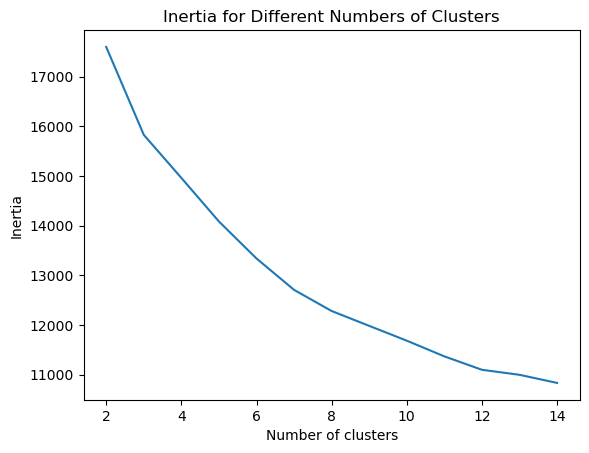

In [44]:
plt.plot(range(2, 15), clusters)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia for Different Numbers of Clusters')
plt.show()

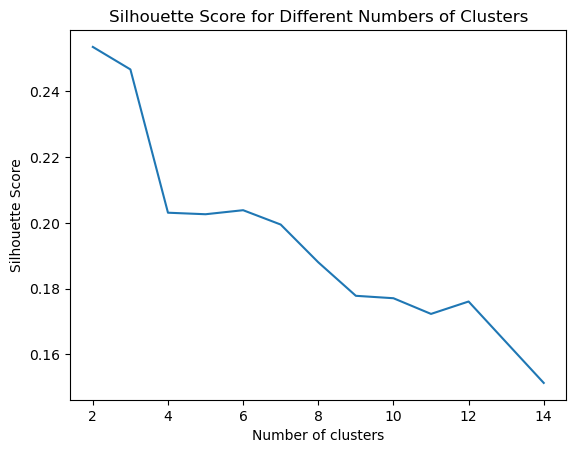

In [45]:
plt.plot(range(2, 15), ss)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

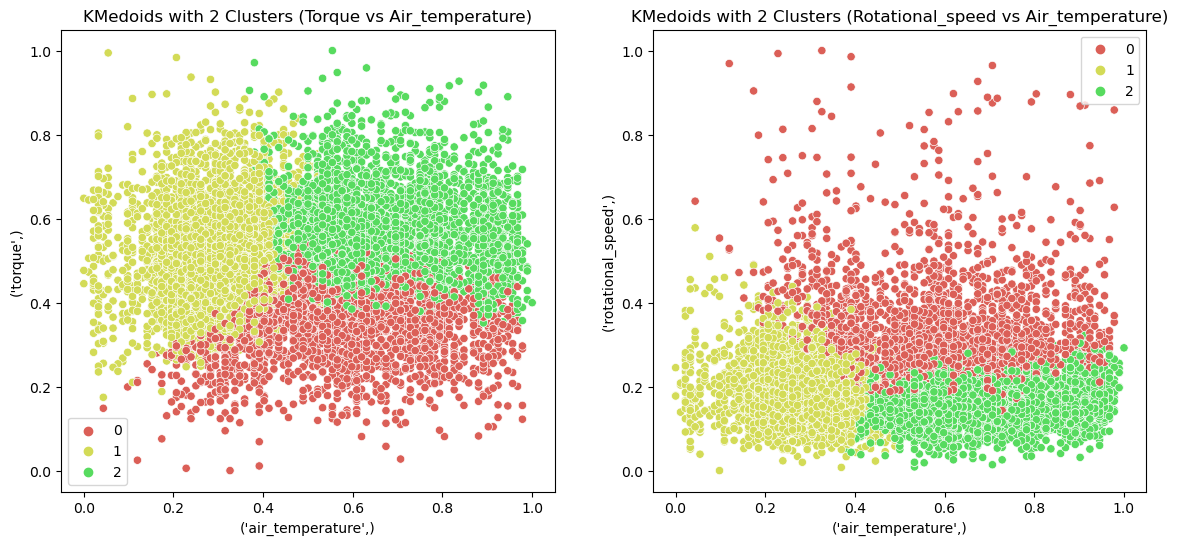

In [47]:
kmedoids_final = KMedoids(n_clusters=3, random_state=0)
kmedoids_final.fit(X_scaled)
labels = kmedoids_final.labels_

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
# Plot the first scatter plot (Torque vs Air_temperature)
sns.scatterplot(x=X['air_temperature'].squeeze(), y=X['torque'].squeeze(), hue=labels,
                palette=sns.color_palette('hls', 6), ax=axs[0])
axs[0].set_title('KMedoids with 2 Clusters (Torque vs Air_temperature)')

# Plot the second scatter plot (Rotational_speed vs Air_temperature)
sns.scatterplot(x=X['air_temperature'].squeeze(), y=X['rotational_speed'].squeeze(), hue=labels,
                palette=sns.color_palette('hls', 6), ax=axs[1])
axs[1].set_title('KMedoids with 2 Clusters (Rotational_speed vs Air_temperature)')

plt.show()

# DBSCAN


In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [51]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
from itertools import product
import numpy as np 

eps_values = np.arange(0.3,1.6,0.1) # valeurs eps à examiner
min_samples = np.arange(3,8) #  valeurs min_samples à examiner
DBSCAN_params = list(product(eps_values, min_samples))

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_scaled)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_scaled, DBS_clustering.labels_))

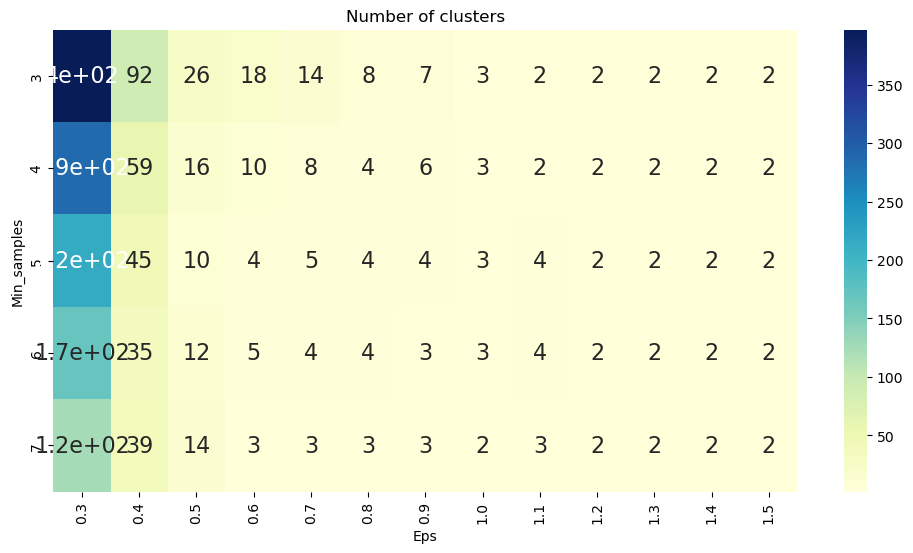

In [53]:
from matplotlib.ticker import FormatStrFormatter

tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels([str(round(float(label), 2)) for label in labels])
ax.set_title('Number of clusters')
plt.show()

de cette heatmap on peut deduire que eps=0.3


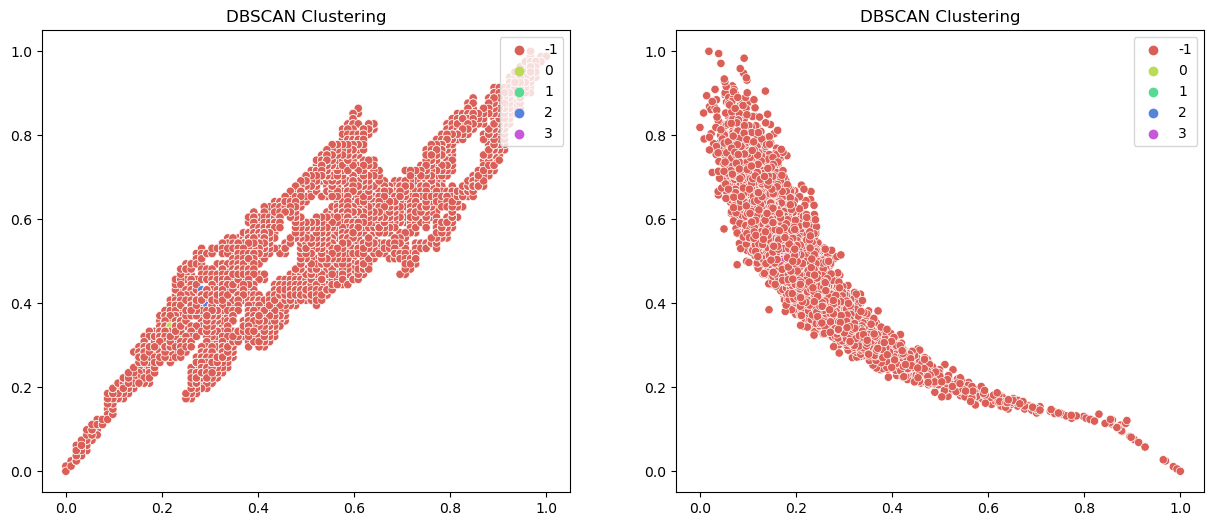

In [54]:
dbscan = DBSCAN(eps=0.3, min_samples=14)
clusters = dbscan.fit_predict(X_scaled)
length = len(np.unique(clusters))

fig = plt.figure(figsize=(15,6))

# Scatter plot for Air temperature [K] vs. Process temperature [K]
ax1 = fig.add_subplot(121)
sns.scatterplot(x=X['air_temperature'].values.flatten(), y=X['process_temperature'].values.flatten(), hue=clusters, 
                palette=sns.color_palette('hls', length), ax=ax1)
ax1.set_title('DBSCAN Clustering')
ax1.legend(loc='upper right')

# Scatter plot for Rotational speed [rpm] vs. Torque [Nm]
ax2 = fig.add_subplot(122)
sns.scatterplot(x=X['rotational_speed'].values.flatten(), y=X['torque'].values.flatten(), hue=clusters, 
                palette=sns.color_palette('hls', length), ax=ax2)
ax2.set_title('DBSCAN Clustering')
ax2.legend(loc='upper right')

plt.show()

In [55]:
dbscan_predictions = dbscan.labels_
X['Cluster_DBSCAN'] = dbscan_predictions

In [56]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: -0.3368137476897727


Le score de silhouette mesure à quel point chaque point est bien assorti à son propre cluster par rapport aux autres clusters. Le score varie de -1 à 1. Un score de silhouette négatif, comme dans votre cas (-0.336), indique que les clusters se chevauchent et que de nombreux points sont probablement mal assignés à leurs clusters. Cela suggère que le clustering n'est pas très cohérent et que les données ne se prêtent peut-être pas bien à l'utilisation de l'algorithme DBSCAN avec les paramètres actuels.